In [17]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("telecom_churn_clean.csv")

X =df[["total_day_charge", "total_eve_charge"]].values
y = df["churn"]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [11]:
X_new = np.random.randn(3,2)
print(X_new.shape)

predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

(3, 2)
Predictions: [0 0 0]


### Measure model performance

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.872


Text(0, 0.5, 'Accuracy')

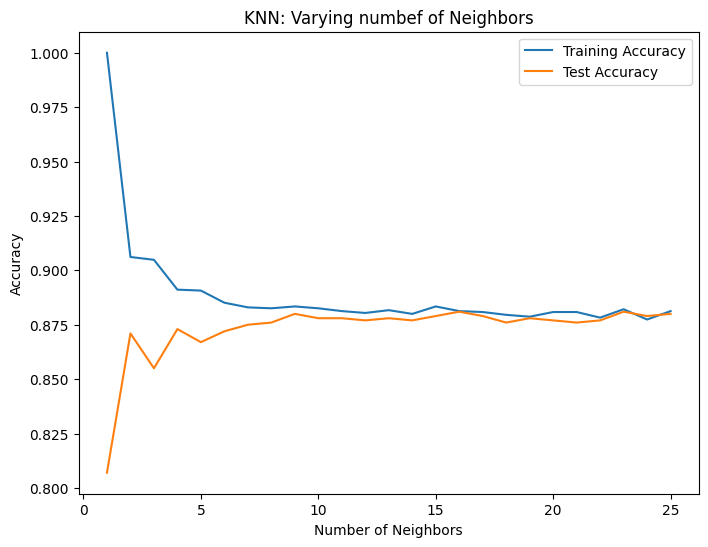

In [23]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


plt.figure(figsize=(8,6))
plt.title("KNN: Varying numbef of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
